<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Simple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!pip install --upgrade scikit-learn


### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-01-27 12:41:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2024-01-27 12:41:10 (28.0 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In case you're working **locally** uncomment the below line. 


In [4]:
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.


In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


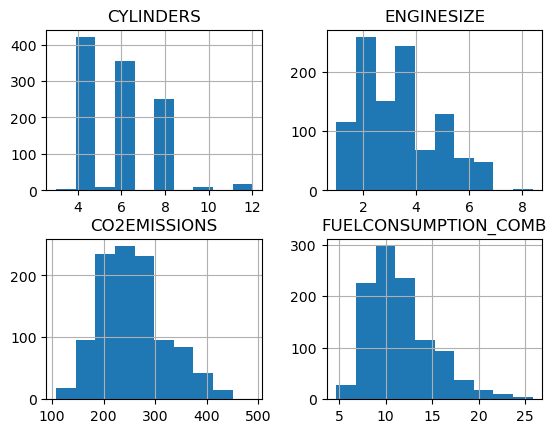

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


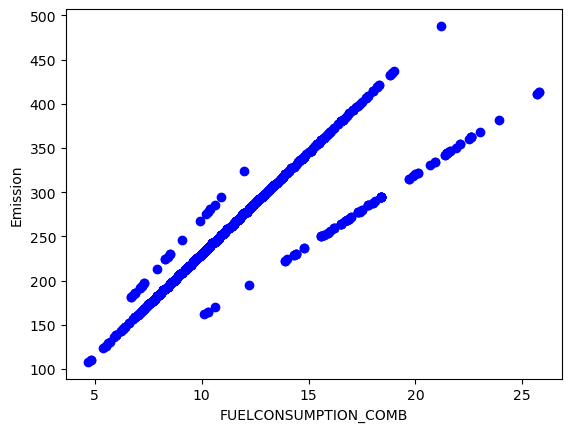

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

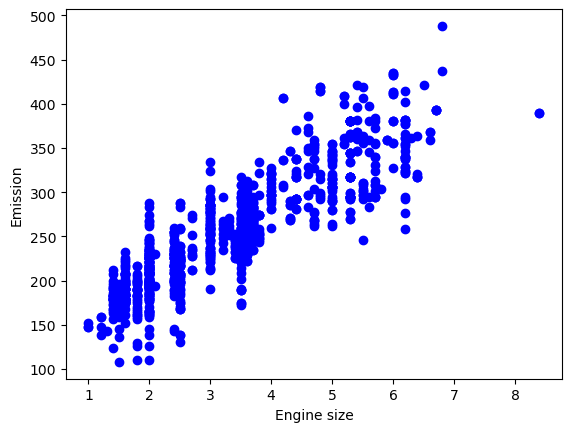

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


In [11]:
# write your code here




<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


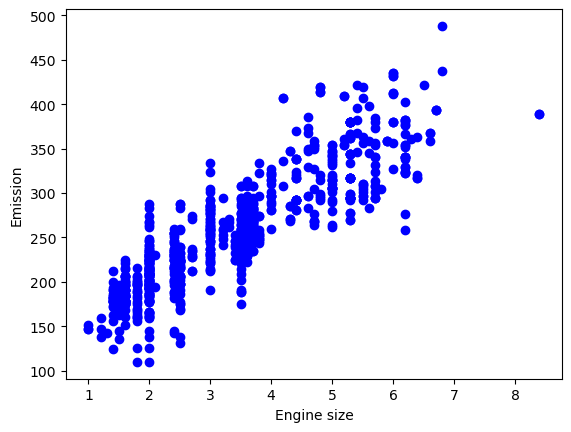

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.


In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.31855145]]
Intercept:  [125.24153374]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

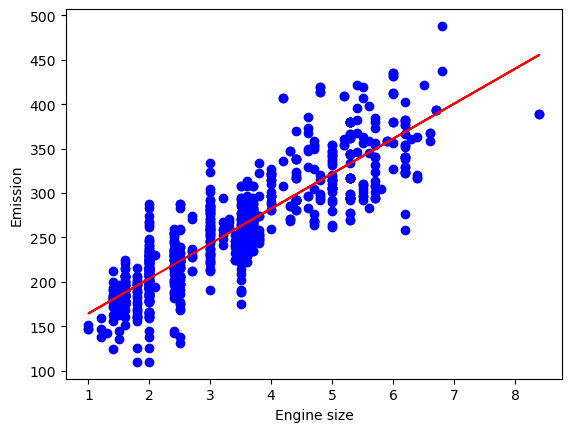

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


# Models to create

## The goal: predict fuel consumption on highway

### Model 1: Single linear regression
### Model 2: Multiple linear regression
### Model 3: Polynomial regression
### Model 4: Polynomial regression with Normalization
### Model 5: Ridge regression with Polynomial regression with normalization

# Evaluation
Use cross-validation 9:1

### 1. Mean Absolute Error
### 2. Mean Squared Error
### 3. Root Mean squared error
### 4. R-squared

In [16]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [17]:
mae_list = []
mse_list = []
rmse_list = []
r_squared_list = []

# 1. Single linear regression

In [18]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy


In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [20]:
# Find the variable with highest correlation

model=LinearRegression()

# Split the data into features (X) and target variable (y)

X=df[['CO2EMISSIONS']]
y=df["FUELCONSUMPTION_HWY"]

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Display cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")

# Calculate the mean absolute error
mean_mae = -cv_scores.mean()
print(f"Mean Absolute Error: {mean_mae}")

mae_list.append(mean_mae)

Cross-Validation Scores: [-1.01770173 -1.30892713 -0.86916498 -0.57131037 -0.56988772]
Mean Absolute Error: 0.8673983854410512


In [21]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")

# Calculate the mean squared error
mean_mse = -cv_scores.mean()
print(f"Mean Squared Error: {mean_mse}")

mse_list.append(mean_mse)

Cross-Validation Scores: [-1.56808823 -4.8403665  -2.61933761 -1.0069685  -0.70379731]
Mean Squared Error: 2.147711632159058


In [22]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -cv_scores.mean()

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

rmse_list.append(rmse)

Root Mean Squared Error: 1.4655072951572292


In [23]:
# Create a linear regression model
model = LinearRegression()

# Perform cross-validation for R-squared
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Display cross-validation scores
print(f"Cross-Validation R-squared Scores: {cv_scores}")

# Calculate the mean R-squared
mean_r2 = cv_scores.mean()
print(f"Mean R-squared: {mean_r2}")

r_squared_list.append(mean_r2)

Cross-Validation R-squared Scores: [0.69750684 0.62625125 0.71352959 0.82941544 0.83457233]
Mean R-squared: 0.7402550922640218


# 2 Multiple Linear Regression

In [24]:
# Find the variable with highest correlation

model=LinearRegression()

# Split the data into features (X) and target variable (y)

X=df[['CO2EMISSIONS',"ENGINESIZE","CYLINDERS"]]
y=df["FUELCONSUMPTION_HWY"]


# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Display cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")

# Calculate the mean absolute error
mean_mae = -cv_scores.mean()
print(f"Mean Absolute Error: {mean_mae}")

mae_list.append(mean_mae)

Cross-Validation Scores: [-0.9158598  -1.40405036 -0.87834768 -0.64536237 -0.5653593 ]
Mean Absolute Error: 0.8817959024625546


In [25]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")

# Calculate the mean squared error
mean_mse = -cv_scores.mean()
print(f"Mean Squared Error: {mean_mse}")

mse_list.append(mean_mse)

Cross-Validation Scores: [-1.33873321 -4.78757188 -2.4659803  -1.09573216 -0.67092892]
Mean Squared Error: 2.071789293704111


In [26]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -cv_scores.mean()

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

rmse_list.append(rmse)

Root Mean Squared Error: 1.43937114522423


In [27]:
# Create a linear regression model
model = LinearRegression()

# Perform cross-validation for R-squared
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Display cross-validation scores
print(f"Cross-Validation R-squared Scores: {cv_scores}")

# Calculate the mean R-squared
mean_r2 = cv_scores.mean()
print(f"Mean R-squared: {mean_r2}")

r_squared_list.append(mean_r2)

Cross-Validation R-squared Scores: [0.74175073 0.63032779 0.73030189 0.81437852 0.84229805]
Mean R-squared: 0.7518113980583057


# 3.Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import make_scorer, r2_score

In [29]:
X=df[['CO2EMISSIONS',"ENGINESIZE","CYLINDERS"]]
y=df["FUELCONSUMPTION_HWY"]

# Create a linear regression model
model = LinearRegression()

# Create polynomial features of second order
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Perform cross-validated R-squared
# Define a custom scorer for mean absolute error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring=mae_scorer)

# Take the absolute values of the scores
cv_absolute_scores = np.abs(cv_scores)

# Calculate the mean absolute error
mean_mae = np.mean(cv_absolute_scores)

print(f"Cross-Validation Absolute Errors: {cv_absolute_scores}")
print(f"Mean Absolute Error (MAE): {mean_mae}")

mae_list.append(mean_mae)

Cross-Validation Absolute Errors: [0.84617957 1.36655743 0.93096794 0.72051987 0.61067039]
Mean Absolute Error (MAE): 0.8949790421500212


In [30]:
# Define a custom scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring=mse_scorer)

# Take the absolute values of the scores
cv_absolute_scores = np.abs(cv_scores)

# Calculate the mean squared error
mean_mse = np.mean(cv_absolute_scores)

print(f"Cross-Validation Absolute Errors: {cv_absolute_scores}")
print(f"Mean Squared Error (MSE): {mean_mse}")

mse_list.append(mean_mse)

Cross-Validation Absolute Errors: [1.43938714 4.45778102 2.38265272 1.13041366 0.79657103]
Mean Squared Error (MSE): 2.041361113713985


In [31]:
# Define a custom scorer for root mean squared error
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring=rmse_scorer)

# Take the absolute values of the scores
cv_absolute_scores = np.abs(cv_scores)

# Calculate the root mean squared error
mean_rmse = np.mean(cv_absolute_scores)

print(f"Cross-Validation Absolute Errors: {cv_absolute_scores}")
print(f"Root Mean Squared Error (RMSE): {mean_rmse}")

rmse_list.append(mean_rmse)

Cross-Validation Absolute Errors: [1.19974462 2.11134578 1.54358437 1.06320913 0.89250828]
Root Mean Squared Error (RMSE): 1.3620784368760614


In [32]:
# Define a custom scorer for R-squared
r2_scorer = make_scorer(r2_score)

# Perform cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring=r2_scorer)

# Calculate the mean R-squared
mean_r2 = np.mean(cv_scores)

print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared: {mean_r2}")

r_squared_list.append(mean_r2)

Cross-Validation R-squared Scores: [0.72233402 0.65579258 0.73941522 0.80850333 0.81276586]
Mean R-squared: 0.7477622018851502


# 4. Polynomial features with normalization

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [34]:
X=df[['CO2EMISSIONS',"ENGINESIZE","CYLINDERS"]]
y=df["FUELCONSUMPTION_HWY"]


# Create a pipeline with normalization, polynomial transformation, and linear regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Define custom scorer for mean absolute error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation for Mean Absolute Error
cv_mae_scores = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)

# Take the absolute values of the scores
cv_absolute_scores = np.abs(cv_mae_scores)

# Calculate the mean absolute error
mean_mae = np.mean(cv_absolute_scores)

print(f"Cross-Validation Absolute Errors: {cv_absolute_scores}")
print(f"Mean Absolute Error (MAE): {mean_mae}")

mae_list.append(mean_mae)

Cross-Validation Absolute Errors: [0.84617957 1.36655743 0.93096794 0.72051987 0.61067039]
Mean Absolute Error (MAE): 0.8949790421534491


In [35]:
# Create a pipeline with normalization, polynomial transformation, and linear regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Define custom scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation for Mean Squared Error
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

# Take the absolute values of the scores
cv_absolute_scores = np.abs(cv_mse_scores)

# Calculate the mean squared error
mean_mse = np.mean(cv_absolute_scores)

print(f"Cross-Validation Absolute Errors: {cv_absolute_scores}")
print(f"Mean Squared Error (MSE): {mean_mse}")

mse_list.append(mean_mse)

Cross-Validation Absolute Errors: [1.43938714 4.45778102 2.38265272 1.13041366 0.79657103]
Mean Squared Error (MSE): 2.0413611137129535


In [36]:
# Create a pipeline with normalization, polynomial transformation, and linear regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Define custom scorer for root mean squared error
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation for Root Mean Squared Error
cv_rmse_scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)

# Take the absolute values of the scores
cv_absolute_scores = np.abs(cv_rmse_scores)

# Calculate the root mean squared error
mean_rmse = np.mean(cv_absolute_scores)

print(f"Cross-Validation Absolute Errors: {cv_absolute_scores}")
print(f"Root Mean Squared Error (RMSE): {mean_rmse}")

rmse_list.append(mean_rmse)

Cross-Validation Absolute Errors: [1.19974462 2.11134578 1.54358437 1.06320913 0.89250828]
Root Mean Squared Error (RMSE): 1.3620784368753476


In [37]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Define custom scorer for R-squared
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring=r2_scorer)

# Calculate the mean R-squared
mean_r2 = np.mean(cv_r2_scores)

print(f"Cross-Validation R-squared Scores: {cv_r2_scores}")
print(f"Mean R-squared: {mean_r2}")

r_squared_list.append(mean_r2)

Cross-Validation R-squared Scores: [0.72233402 0.65579258 0.73941522 0.80850333 0.81276586]
Mean R-squared: 0.7477622018855857


# 5. Ridge regression - Polynomial Features

In [38]:
from sklearn.linear_model import Ridge

In [39]:
# Split the dataset into training and test sets (90% train, 10% test)
X=df[['CO2EMISSIONS',"ENGINESIZE","CYLINDERS"]]
y=df["FUELCONSUMPTION_HWY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a pipeline with normalization, polynomial transformation, and Ridge regression
alphas = [0.1, 1.0, 10.0, 100]  # Add more alpha values if needed

best_alpha = None
best_r_squared = -np.inf

for alpha in alphas:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('ridge', Ridge(alpha=alpha))
    ])

    # Use cross-validation to compute R-squared
    r_squared_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    # Average R-squared scores
    mean_r_squared = np.mean(r_squared_scores)

    print(f"For alpha={alpha}, Mean R-squared: {mean_r_squared}")

    # Update the best alpha if needed
    if mean_r_squared > best_r_squared:
        best_r_squared = mean_r_squared
        best_alpha = alpha
        
print("Best alpha: ", best_alpha)

For alpha=0.1, Mean R-squared: 0.7491274941329205
For alpha=1.0, Mean R-squared: 0.7560999110768944
For alpha=10.0, Mean R-squared: 0.7586177834668534
For alpha=100, Mean R-squared: 0.7407984456492287
Best alpha:  10.0


In [40]:
# Create a pipeline with normalization, polynomial transformation, and Ridge regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])

# Define custom scorer for MAE
mae_scorer = make_scorer(mean_absolute_error)

# Use cross-validation to compute MAE
mae_scores = -cross_val_score(model, X, y, cv=5, scoring=mae_scorer)

# Average MAE scores
mean_mae = -np.mean(mae_scores)

print(f"Cross-Validation MAE Scores: {mae_scores}")
print(f"Mean MAE: {mean_mae}")

mae_list.append(mean_mae)

Cross-Validation MAE Scores: [-0.88551472 -1.35018797 -0.91845748 -0.68672396 -0.55730682]
Mean MAE: 0.8796381909805598


In [41]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])

# Define custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error)

# Use cross-validation to compute MSE
mse_scores = -cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

# Average MSE scores
mean_mse = -np.mean(mse_scores)

print(f"Cross-Validation MSE Scores: {mse_scores}")
print(f"Mean MSE: {mean_mse}")

mse_list.append(mean_mse)

Cross-Validation MSE Scores: [-1.2974313  -4.60633997 -2.45442483 -1.08954392 -0.62941169]
Mean MSE: 2.015430341971801


In [42]:
# Define custom scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

# Use cross-validation to compute RMSE
rmse_scores = -cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)

# Average RMSE scores
mean_rmse = -np.mean(rmse_scores)

print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")

rmse_list.append(mean_rmse)

Cross-Validation RMSE Scores: [-1.13904842 -2.14623856 -1.56666041 -1.04381221 -0.79335471]
Mean RMSE: 1.3378228599632833


In [43]:
# Define custom scorer for R-squared
r_squared_scorer = make_scorer(r2_score)

# Use cross-validation to compute R-squared
r_squared_scores = cross_val_score(model, X, y, cv=5, scoring=r_squared_scorer)

# Average R-squared scores
mean_r_squared = np.mean(r_squared_scores)

r_squared_list.append(mean_r_squared)

print(f"Cross-Validation R-squared Scores: {r_squared_scores}")
print(f"Mean R-squared: {mean_r_squared}")

Cross-Validation R-squared Scores: [0.74971811 0.64432161 0.73156568 0.81542683 0.85205669]
Mean R-squared: 0.7586177834668534


In [44]:


data = {
    'Model': ['Single Linear regression', 'Multiple Linear Regression', 'Polynomial regression', 'Polynomial regression with normalization', 'Ridge regression +polynomial features'],
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE':rmse_list,
    'R-squared':r_squared_list
}

# Create a DataFrame from the dictionary
model_summary= pd.DataFrame(data)



# RESULT

In [45]:
display(model_summary)

,Model,MAE,MSE,RMSE,R-squared
0,Single Linear regression,0.867398,2.147712,1.465507,0.740255
1,Multiple Linear Regression,0.881796,2.071789,1.439371,0.751811
2,Polynomial regression,0.894979,2.041361,1.362078,0.747762
3,Polynomial regression with normalization,0.894979,2.041361,1.362078,0.747762
4,Ridge regression +polynomial features,0.879638,2.015430,1.337823,0.758618


# CONCLUSION

#### I have used multiple simple regression models. The performance have been very similar in all the models, there are not significant differences in performance. However the ridge regression using polynomaial features performed the best. All the evaluation metrics has been best for the model.

### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

Azim Hirjani


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03 | 2.1  | Lakshmi Holla  |  Changed URL of the csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
